### Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# reading the csv file and converting the date in to datetime format
data=pd.read_csv('../data/external/machine_temperature_system_failure.csv',parse_dates=["timestamp"])
datacopy=pd.read_csv('../data/external/machine_temperature_system_failure.csv',parse_dates=["timestamp"])

In [3]:
data.dtypes

timestamp    datetime64[ns]
value               float64
dtype: object

In [4]:
data.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [5]:
data.shape

(22695, 2)

In [6]:
data.isnull().sum()

timestamp    0
value        0
dtype: int64

In [7]:
duplicateRowsDF = data[data.duplicated(['timestamp','value'])]
duplicateRowsDF.head()

,timestamp,value


In [8]:
boolean = any(data['timestamp'].duplicated())
boolean

True

In [9]:
duplicateRowsDF = data[data.duplicated(['timestamp'])]
duplicateRowsDF.head()

,timestamp,value
10149,2014-01-07 02:00:00,94.139723
10150,2014-01-07 02:05:00,94.111970
10151,2014-01-07 02:10:00,94.638723
10152,2014-01-07 02:15:00,93.270907
10153,2014-01-07 02:20:00,93.890249


In [10]:
data=data.groupby(['timestamp'])['value'].mean().reset_index()


In [11]:
duplicateRowsDF = data[data.duplicated(['timestamp'])]
duplicateRowsDF.head()

,timestamp,value


In [12]:
data.dtypes

timestamp    datetime64[ns]
value               float64
dtype: object

### Visualization

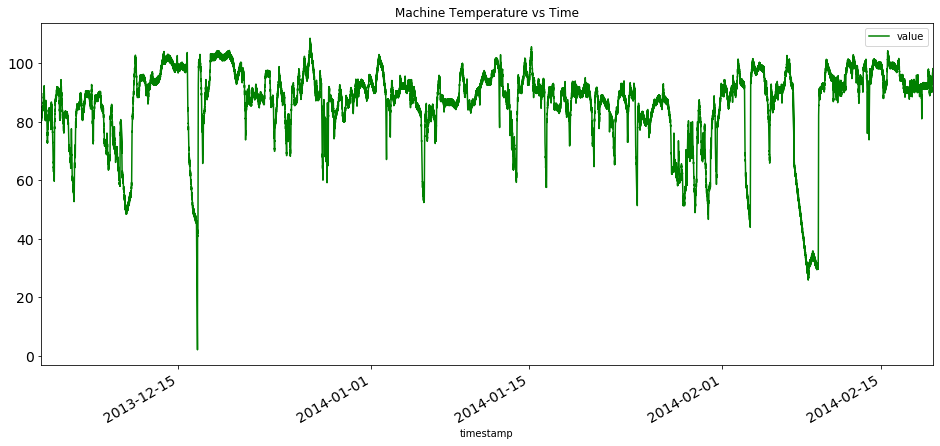

In [13]:
datacopy.plot(x='timestamp', y='value',figsize=(16,7), title= 'Machine Temperature vs Time',color='green', fontsize=14)

#### Extracting new features from the given features

In [14]:
data['hours'] = data['timestamp'].dt.hour
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data.head()

,timestamp,value,hours,year,month
0,2013-12-02 21:15:00,73.967322,21,2013,12
1,2013-12-02 21:20:00,74.935882,21,2013,12
2,2013-12-02 21:25:00,76.124162,21,2013,12
3,2013-12-02 21:30:00,78.140707,21,2013,12
4,2013-12-02 21:35:00,79.329836,21,2013,12


In [15]:
data['duringsun'] = ((data['hours'] >= 6) & (data['hours'] <= 18)).astype(int)
      

In [16]:
# Extracting some interesting features from the given features
data['DayOfTheWeek'] = data['timestamp'].dt.dayofweek
data['WeekDay'] = (data['DayOfTheWeek'] < 5).astype(int)
data['categories'] = data['WeekDay']*2 + data['duringsun']
data.dtypes

timestamp       datetime64[ns]
value                  float64
hours                    int64
year                     int64
month                    int64
duringsun                int64
DayOfTheWeek             int64
WeekDay                  int64
categories               int64
dtype: object

In [17]:
# algorithm for the extracting features
for index, row in data.iterrows():
    if(row['WeekDay']==1 & row['duringsun']==1):
        data['categories']==1
    elif(row['WeekDay']==1 & row['duringsun']==0):
        data['categories']==2
    elif(row['WeekDay']==0 & row['duringsun']==1):
        data['categories']==3
    elif(row['WeekDay']==0 & row['duringsun']==0):
        data['categories']==4
    
    
    
    

In [18]:
data['time'] = (data['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

In [19]:
data.head()
    

,timestamp,value,hours,year,month,duringsun,DayOfTheWeek,WeekDay,categories,time
0,2013-12-02 21:15:00,73.967322,21,2013,12,0,0,1,2,13860189
1,2013-12-02 21:20:00,74.935882,21,2013,12,0,0,1,2,13860192
2,2013-12-02 21:25:00,76.124162,21,2013,12,0,0,1,2,13860195
3,2013-12-02 21:30:00,78.140707,21,2013,12,0,0,1,2,13860198
4,2013-12-02 21:35:00,79.329836,21,2013,12,0,0,1,2,13860201


In [20]:
databar = pd.DataFrame(data, columns = ['value','categories'])
databar.head()

,value,categories
0,73.967322,2
1,74.935882,2
2,76.124162,2
3,78.140707,2
4,79.329836,2


In [21]:
#plotting the temperature vs the category on the histogram
weeksun = data.loc[data['categories'] == 1, 'value']
weeknight= data.loc[data['categories'] == 2, 'value']
weekoffsun = data.loc[data['categories'] == 3, 'value']
weekofnight = data.loc[data['categories'] == 4, 'value']

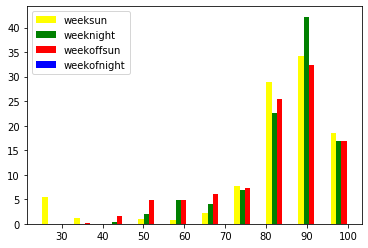

In [22]:
import warnings  
warnings.filterwarnings('ignore')
fig, ax = plt.subplots()

weeksun_heights, weeksun_bins = np.histogram(weeksun)
weeknight_heights, weeknight_bins = np.histogram(weeknight, bins=weeksun_bins)
weekoffsun_heights, weekoffsun_bins = np.histogram(weekoffsun, bins=weeksun_bins)
weekofnight_heights, weekofnight_bins = np.histogram(weekofnight, bins=weeksun_bins)
width = (weeksun_bins[1] - weeksun_bins[0])/6
ax.bar(weeksun_bins[:-1], weeksun_heights*100/weeksun.count(), width=width, facecolor='yellow', label='weeksun')
ax.bar(weeknight_bins[:-1]+width, (weeknight_heights*100/weeknight.count()), width=width, facecolor='green', label ='weeknight')
ax.bar(weekoffsun_bins[:-1]+width*2, (weekoffsun_heights*100/weekoffsun.count()), width=width, facecolor='red', label ='weekoffsun')
ax.bar(weekofnight_bins[:-1]+width*3, (weekofnight_heights*100/weekofnight.count()), width=width, facecolor='blue', label ='weekofnight')

plt.legend()
plt.show()

In [23]:
data.dtypes

timestamp       datetime64[ns]
value                  float64
hours                    int64
year                     int64
month                    int64
duringsun                int64
DayOfTheWeek             int64
WeekDay                  int64
categories               int64
time                     int64
dtype: object

### Anamoly detection using isolation forest

#### Contamination =0.05

In [24]:

#metrics_df.columns
#specify the 12 metrics column names to be modelled
dataisolation = data[['value', 'hours', 'duringsun', 'DayOfTheWeek', 'WeekDay']]
to_model_columns=dataisolation.columns
from sklearn.ensemble import IsolationForest
clf=IsolationForest( n_estimators=100, max_samples='auto', contamination=0.05, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(dataisolation[to_model_columns])
pred = clf.predict(dataisolation[to_model_columns])
dataisolation['anomaly']=pred
outliers=dataisolation.loc[dataisolation['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dataisolation['anomaly'].value_counts())

 1    21548
-1     1135
Name: anomaly, dtype: int64


### 3D visualizations of Outliers

#### Here we are fitting all the features into 3 dimensions using PCA

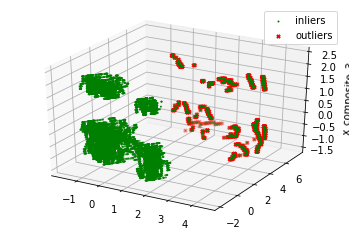

In [25]:

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(dataisolation[dataisolation.columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=1, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=10, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

### 2D visualizations of Outliers

#### Here we are fitting all the features into 2 dimensions using PCA

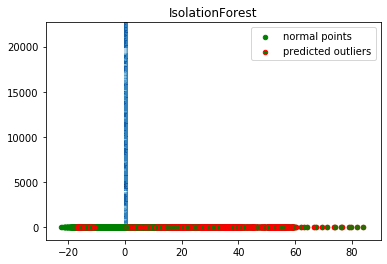

In [26]:
pca = PCA(2)
pca.fit(dataisolation[to_model_columns])
res=pd.DataFrame(pca.transform(dataisolation[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

#### Contamination =0.1

In [27]:
dataisolation1 = data[['value', 'hours', 'duringsun', 'DayOfTheWeek', 'WeekDay']]
to_model_columns=dataisolation1.columns
from sklearn.ensemble import IsolationForest
clf=IsolationForest( n_estimators=500, max_samples='auto', contamination=0.1, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(dataisolation1[to_model_columns])
pred = clf.predict(dataisolation1[to_model_columns])
dataisolation1['anomaly']=pred
outliers=dataisolation1.loc[dataisolation1['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dataisolation1['anomaly'].value_counts())

 1    20414
-1     2269
Name: anomaly, dtype: int64


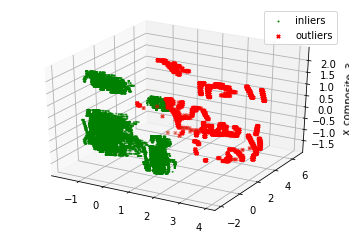

In [28]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(dataisolation1[dataisolation1.columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=1, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=10, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

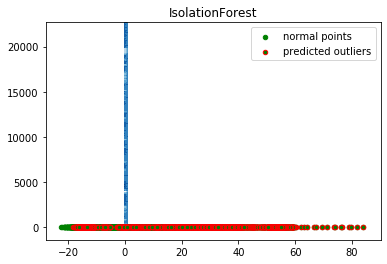

In [29]:
pca = PCA(2)
pca.fit(dataisolation1[to_model_columns])
res=pd.DataFrame(pca.transform(dataisolation1[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

### Observations

#### 1. As the contamination value increases the number of outliers detected increases

### Anamoly detection using svm model

In [30]:
from sklearn.svm import OneClassSVM
dataisolation2 = data[['value', 'hours', 'duringsun', 'DayOfTheWeek', 'WeekDay']]
to_model_columns=dataisolation2.columns
from sklearn.ensemble import IsolationForest
clf=OneClassSVM(nu=0.95 * 0.05)
clf.fit(dataisolation2[to_model_columns])
pred = clf.predict(dataisolation2[to_model_columns])
dataisolation2['anomaly']=pred
outliers=dataisolation2.loc[dataisolation2['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dataisolation2['anomaly'].value_counts())

 1    20504
-1     2179
Name: anomaly, dtype: int64


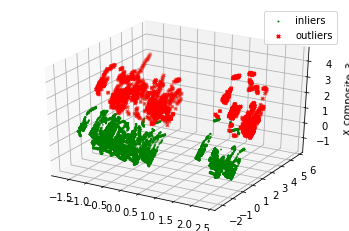

In [31]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(dataisolation2[dataisolation2.columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=1, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=10, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

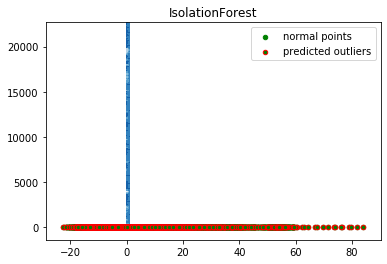

In [32]:
pca = PCA(2)
pca.fit(dataisolation2[to_model_columns])
res=pd.DataFrame(pca.transform(dataisolation2[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()